### Hypothesis Testing

In [78]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

In [79]:
np.random.seed(0)

In [80]:
N = 100
mu = 0.2
sigma = 1
x = np.random.randn(N)*sigma + mu   #samples

In [81]:
#two-sided test
ztest(x)    #reference value = 0

(2.5648404153513686, 0.01032232684881584)

In [82]:
#two-sided test from scratch
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)    #unbiased std
z = mu_hat / (sigma_hat/np.sqrt(N))
p_right = 1 - norm.cdf(np.abs(z))
p_left  = norm.cdf(-np.abs(z))
p = p_right + p_left
z,p

(2.564840415351368, 0.010322326848815901)

In [83]:
#one-sided test
ztest(x, alternative='larger')     #alternative hypothesis with mu > mu0

(2.5648404153513686, 0.00516116342440792)

In [84]:
#one-sided test from scratch
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat / (sigma_hat/np.sqrt(N))
p = 1 - norm.cdf(z)
z,p

(2.564840415351368, 0.005161163424407977)

In [85]:
#null hypothesis under a different reference value
mu0 = 0.2       #we know that the null hypothesis is true
ztest(x, value=mu0)

(0.5904283402851699, 0.5549035151647227)

In [86]:
#but we cannot accept the null hypothesis, we can only fail to reject it

In [87]:
#null hypothesis under a different reference value from scratch
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)  
z = (mu_hat - mu0) / (sigma_hat/np.sqrt(N))
p_right = 1 - norm.cdf(np.abs(z))
p_left  = norm.cdf(-np.abs(z))
p = p_right + p_left
z,p

(0.5904283402851698, 0.5549035151647228)

In [88]:
#two-sample test
N0 = 100
mu0 = 0.2
sigma0 = 1
x0 = np.random.randn(N)*sigma0 + mu0

N1 = 100
mu1 = 0.5
sigma1 = 1
x1 = np.random.randn(N)*sigma1 + mu1

In [89]:
ztest(x0, x1)

(-1.1234612344369315, 0.2612416557056353)

In [90]:
#two-sample test implementation
mu_hat0 = x0.mean()
mu_hat1 = x1.mean()
dmu_hat = mu_hat1 - mu_hat0
s2_hat0 = x0.var(ddof=1)
s2_hat1 = x1.var(ddof=1)
s_hat = np.sqrt(s2_hat0 / N0 + s2_hat1 / N1)
z = dmu_hat / s_hat    #reference value = 0
p_right = 1 - norm.cdf(np.abs(z))
p_left  = norm.cdf(-np.abs(z))
p = p_right + p_left
z,p         #the sign does not matter in two-sided test

(1.1234612344369315, 0.26124165570563523)

In [91]:
#show that we will reject the null hypothesis when the null hypothesis is true (false alarm) 5% of the time
num_tests = 10000
results = np.zeros(num_tests)
for i in range(num_tests):
    x1 = np.random.randn(100)
    x2 = np.random.randn(100)
    z, p = ztest(x1, x2)
    results[i] = (p < 0.05)
print(results.mean())

0.049


In [92]:
#we get false alarm almost 5% of the time

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
#example
df = pd.read_csv("titanic_train.csv")

In [95]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df[df['survived'] == 1].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [97]:
x1 = df[df['survived'] == 1]['fare'].dropna().to_numpy()

In [98]:
x2 = df[df['survived'] == 0]['fare'].dropna().to_numpy()

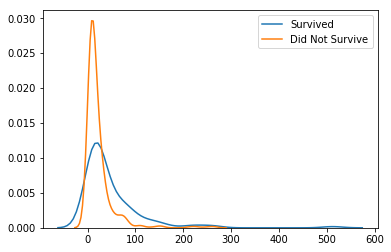

In [99]:
#density plot
sns.kdeplot(x1, label='Survived')
sns.kdeplot(x2, label='Did Not Survive')
plt.legend()

In [100]:
x1.mean(), x2.mean()

(48.39540760233918, 22.117886885245902)

In [101]:
# here the means are different but is the difference significant?

In [102]:
ztest(x1, x2)

(7.939191660871055, 2.035031103573989e-15)

In [103]:
# p-value is very small and less than the significance threshold thus, result observed is very significant
# we would reject the null hypothesis that the average fare of the two groups is the same